In [1]:
import numpy as np
import pandas as pd

In [2]:
#df = pd.read_csv('spam.csv',encoding='unicode_escape')
import pandas as pd

#List of possible encodings to try
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path = 'spam.csv' #change this to the path of your csv file

#Attempt to read the csv file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding = encoding)
        print(f"FIle successfully read with encoding : {encoding}")
        break #Stop the loop when successful
    except UnicodeDecodeError:
        print(f"failed to read with encoding: {encoding}")
        continue # try the next encoding

#if the loop completes with success, df is not defined        
if 'df' in locals():
    print("csv file has successfully uploaded")
else:
    print("All encoding attmepts failed. Unable to read the csv file.")

failed to read with encoding: utf-8
FIle successfully read with encoding : latin1
csv file has successfully uploaded


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2214,ham,Ok then i'll let him noe later n ask him call ...,NaN,NaN,NaN
2350,ham,You will be in the place of that man,NaN,NaN,NaN
5028,spam,I'd like to tell you my deepest darkest fantas...,NaN,NaN,NaN
5070,ham,As in different styles?,NaN,NaN,NaN
5532,ham,happened here while you were adventuring,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1. Data cleaning
#2. EDA
#3. Text preprocessing
#4. Model building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

## 1) Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
3346,ham,No problem baby. Is this is a good time to tal...
4267,ham,Hey so whats the plan this sat?
4906,ham,Then anything special?
1297,ham,"K so am I, how much for an 8th? Fifty?"
3970,spam,Free video camera phones with Half Price line ...


In [9]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4612,ham,How much you got for cleaning
1974,ham,Thats cool. Where should i cum? On you or in y...
4834,ham,"OH RITE. WELL IM WITH MY BEST MATE PETE, WHO I..."
3457,ham,Have your lunch and come quickly and open the ...
1381,ham,We spend our days waiting for the ideal path t...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

403

In [15]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

### eda

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

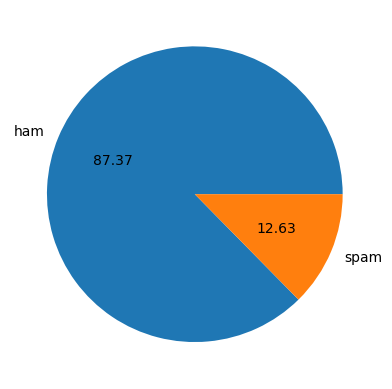

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
#Big chunk of ham and very less spam so out data is not balanced

In [22]:
import nltk

In [23]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TEJASWI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len) #number of char

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #words count

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #sentence

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.545173,1.976785
std,58.236293,13.355245,1.376720
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#targetting ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.221213,1.831709
std,56.358207,13.534878,1.296737
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

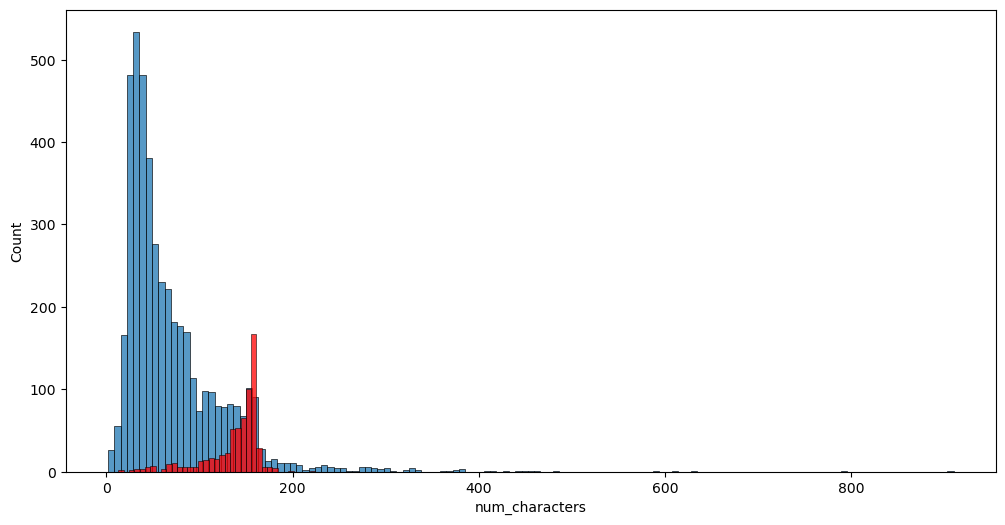

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

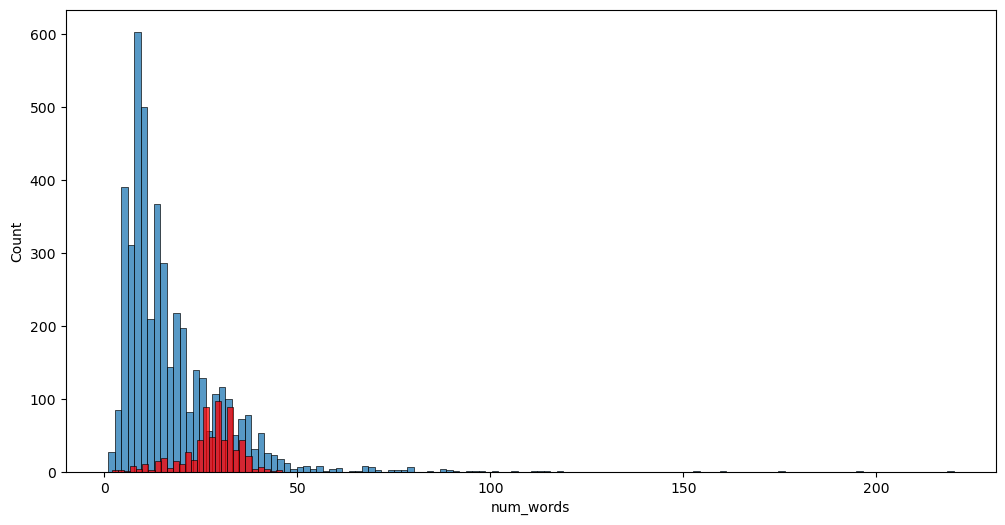

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color ='red')

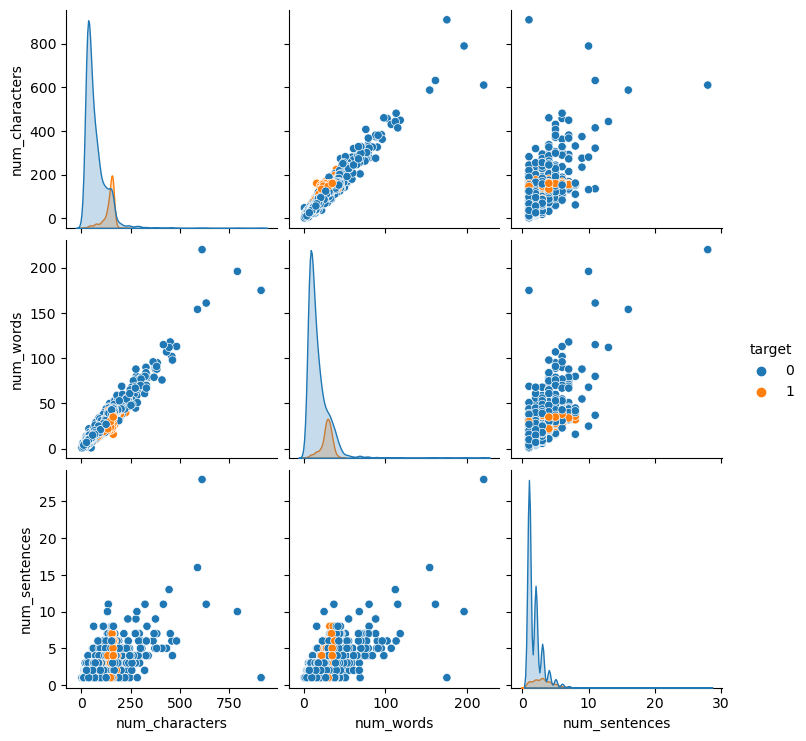

In [36]:
sns.pairplot(df,hue = 'target')

C:\Users\TEJASWI\AppData\Local\Temp\ipykernel_6852\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

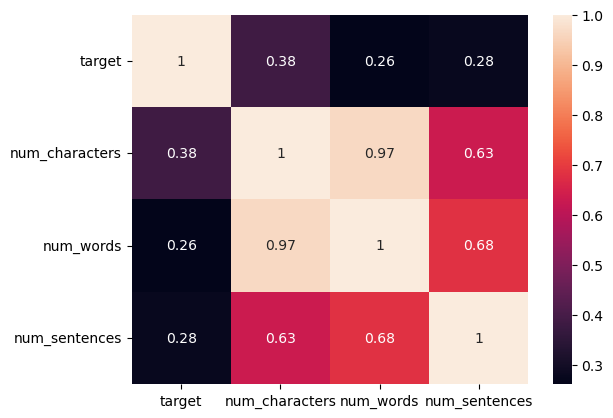

In [37]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing

* Lower Case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords') #You may need to download the stopwords dataset

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this tuff anyone tonight,k?I have cried enough.")

print(transformed_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TEJASWI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


gon na home soon want talk tuff anyone tonight k cried enough i gon na be home soon and i do want to talk about thi tuff anyon tonight k i have cri enough


In [39]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

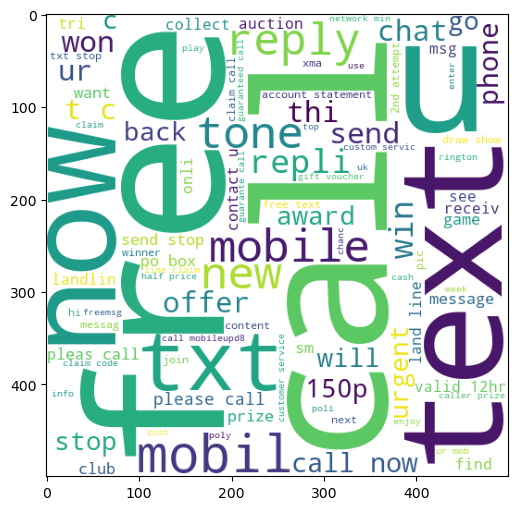

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

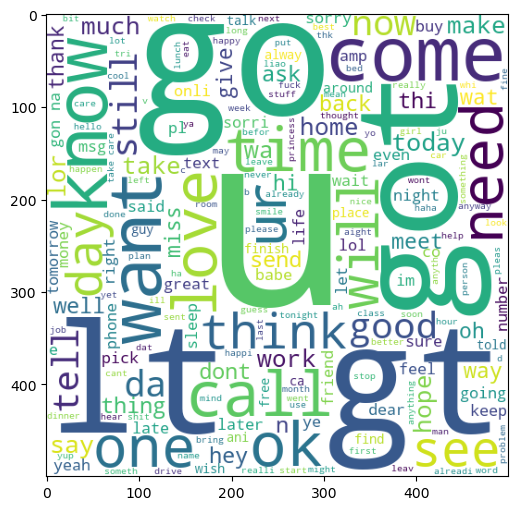

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah i d...


In [60]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [61]:
len(spam_corpus)

24427

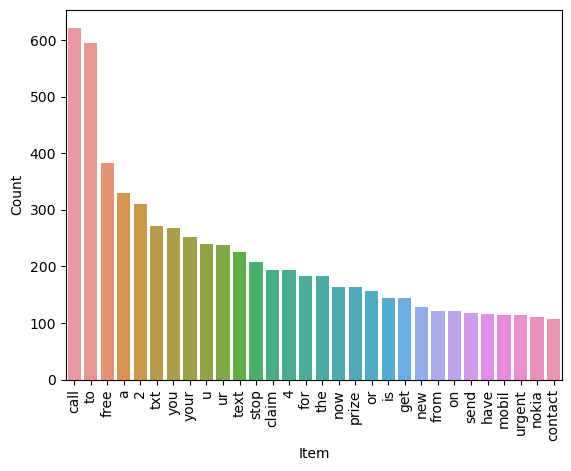

In [68]:
from collections import Counter 
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
common_items_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Item', 'Count'])
sns.barplot(x=common_items_df['Item'], y=common_items_df['Count'])
plt.xticks(rotation = 'vertical')
plt.show()

In [69]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [70]:
len(ham_corpus)

98176

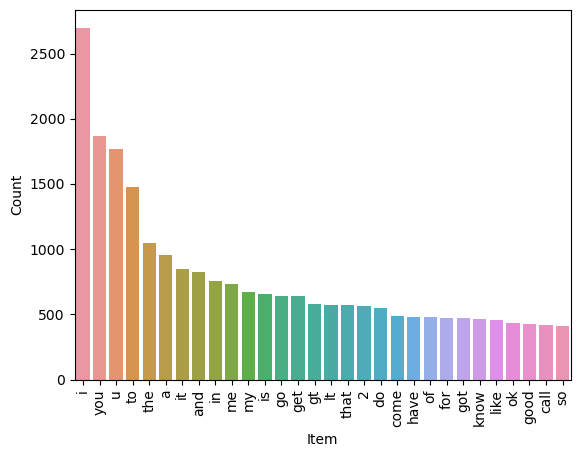

In [71]:
from collections import Counter 
#sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
common_items_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Item', 'Count'])
sns.barplot(x=common_items_df['Item'], y=common_items_df['Count'])
plt.xticks(rotation = 'vertical')
plt.show()

In [72]:
#Text Vectorization
# using Bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah i d...


## 4. Building the model

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [91]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [92]:
#from sklearn.preprocessing import MinMaxScaler
#Scalar = MinMaxScaler()
#X = scaler.fit_transform(X)

In [93]:
#opening the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [94]:
X.shape

(5169, 3000)

In [95]:
y = df['target'].values

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [98]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [99]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [100]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8820116054158608
[[791 105]
 [ 17 121]]
0.5353982300884956


In [101]:
mnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8820116054158608
[[791 105]
 [ 17 121]]
0.5353982300884956


In [102]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[896   0]
 [ 25 113]]
1.0


In [103]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[892   4]
 [ 15 123]]
0.968503937007874


In [104]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [106]:
svc = SVC(kernel='sigmoid', gamma =1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [107]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb  
}

In [108]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [109]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9787234042553191, 0.9833333333333333)

In [110]:
def train_Classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_trian,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [111]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9787234042553191, 0.9833333333333333)

In [115]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
accuracy -  0.9787234042553191
Precision -  0.9833333333333333
For  KN
accuracy -  0.9148936170212766
Precision -  1.0
For  NB
accuracy -  0.9758220502901354
Precision -  1.0
For  DT
accuracy -  0.9410058027079303
Precision -  0.8969072164948454
For  LR
accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  RF
accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
accuracy -  0.965183752417795
Precision -  0.9112903225806451
For  BgC
accuracy -  0.9661508704061895
Precision -  0.9186991869918699
For  ETC
accuracy -  0.9787234042553191
Precision -  0.967741935483871
For  GBDT
accuracy -  0.9593810444874274
Precision -  0.9615384615384616
For  xgb
accuracy -  0.9835589941972921
Precision -  0.991869918699187


In [119]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [121]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.914894,1.000000
2,NB,0.975822,1.000000
10,xgb,0.983559,0.991870
0,SVC,0.978723,0.983333
5,RF,0.973888,0.982609
8,ETC,0.978723,0.967742
9,GBDT,0.959381,0.961538
4,LR,0.957447,0.951923
7,BgC,0.966151,0.918699
6,AdaBoost,0.965184,0.911290


In [122]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [123]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.914894
1,NB,Accuracy,0.975822
2,xgb,Accuracy,0.983559
3,SVC,Accuracy,0.978723
4,RF,Accuracy,0.973888
5,ETC,Accuracy,0.978723
6,GBDT,Accuracy,0.959381
7,LR,Accuracy,0.957447
8,BgC,Accuracy,0.966151
9,AdaBoost,Accuracy,0.965184


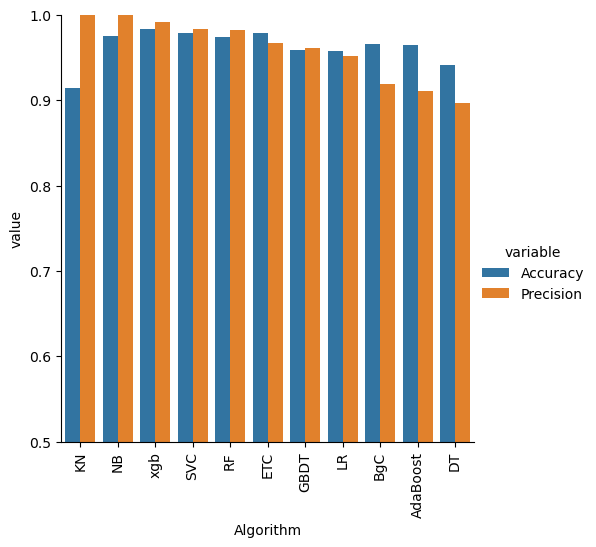

In [128]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable', data=performance_df1,kind = 'bar',height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [129]:
#model improve
#1. change the max_features parameter of TfIdf

In [135]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [136]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [137]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [139]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [140]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.914894,1.000000,0.914894,1.000000,0.914894,1.000000,0.914894,1.000000
1,NB,0.975822,1.000000,0.975822,1.000000,0.975822,1.000000,0.975822,1.000000
2,xgb,0.983559,0.991870,0.983559,0.991870,0.983559,0.991870,0.983559,0.991870
3,SVC,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333
4,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
5,ETC,0.978723,0.967742,0.978723,0.967742,0.978723,0.967742,0.978723,0.967742
6,GBDT,0.959381,0.961538,0.959381,0.961538,0.959381,0.961538,0.959381,0.961538
7,LR,0.957447,0.951923,0.957447,0.951923,0.957447,0.951923,0.957447,0.951923
8,BgC,0.966151,0.918699,0.966151,0.918699,0.966151,0.918699,0.966151,0.918699
9,AdaBoost,0.965184,0.911290,0.965184,0.911290,0.965184,0.911290,0.965184,0.911290


In [141]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [142]:
voting = VotingClassifier(estimators=[('svm',svc), ('nb', mnb), ('et', etc)],voting='soft')

In [143]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [144]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.991869918699187


In [146]:
# Applying stacking
estimators=[('svm', svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [147]:
from sklearn.ensemble import StackingClassifier

In [150]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [151]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
precision 0.9541984732824428


In [152]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [156]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample text data and corresponding labels (replace with your actual data)
X_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train = [0,1,0] # Example labels (0 for negative, 1 for positive)

#Create and train the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase =True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

#Create and train the Naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

#save the trained TF-tdf verctorizer and Naive Bayes model to files
with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
with open('model.pkl','wb') as model_file:
    pickle.dump(mnb, model_file)